<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Fake_News_Detection_PH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection PH
Dataset: https://huggingface.co/datasets/fake_news_filipino

Task: text-classification NLP

Contains 3,206 expertly-labeled news samples, half of which are real and half of which are fake.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

# Data Exploration

In [2]:
df = pd.read_csv('fakenews_data_ph.csv')

In [3]:
df.head()

,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


In [4]:
df.tail()

,label,article
3201,1,Hindi pa nai-enjoy ni Giacomo Filibeck ang Pil...
3202,1,"Sa isang pahayag, binatikos ng Liberal Party (..."
3203,1,Panoorin nyo yung reaction video na ito ni Mr....
3204,1,Para sa mga magkakapatid na laging nagtatalo l...
3205,1,Grabe ibang klase talaga si Vice Ganda kung ma...


In [5]:
df.describe()

,label
count,3206.000000
mean,0.500000
std,0.500078
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


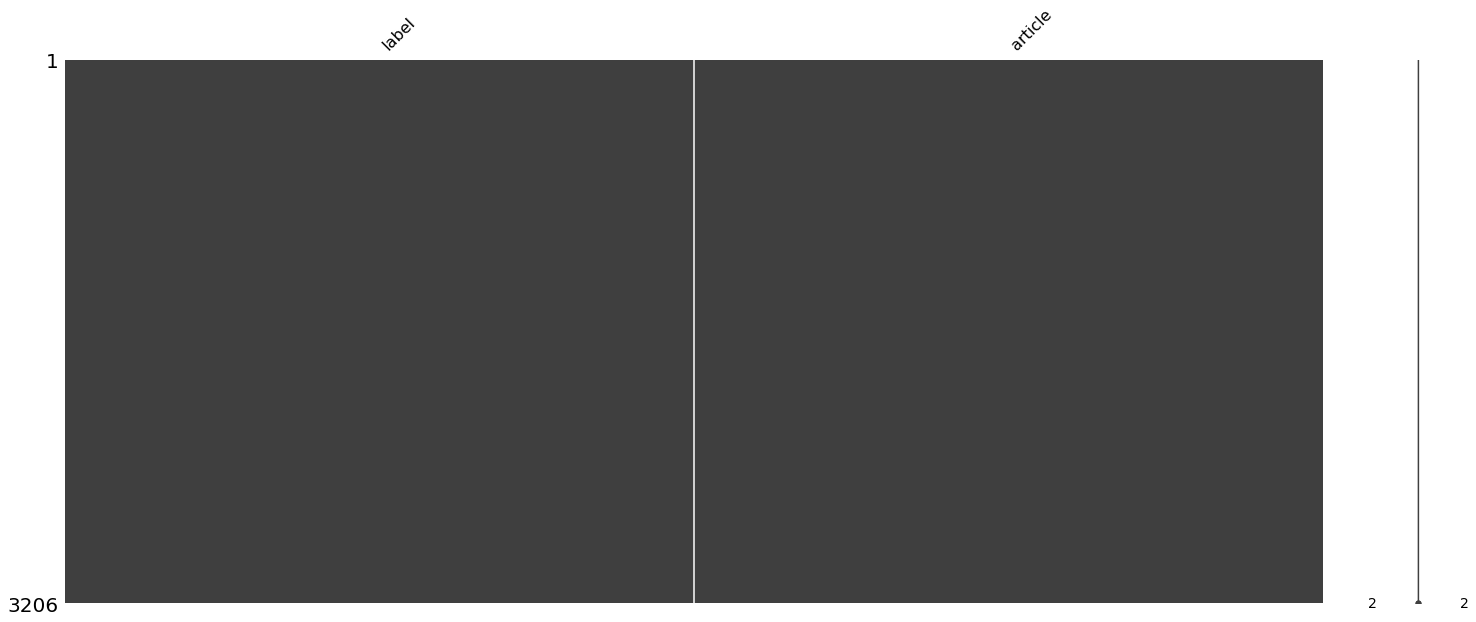

Missing: 0


In [6]:
missingno.matrix(df)
plt.show()
print("Missing: {}".format(df.isna().sum().sum()))

## Shuffling Dataset

In [7]:
from sklearn.utils import shuffle

df = shuffle(df).reset_index(drop=True)

In [8]:
df.head()

,label,article
0,0,INIREKOMENDA ng Department of Health sa Centra...
1,1,Itinampok sa programang Tutok Erwin Tulfo ang ...
2,0,"Aniya, sa maling prescription ng ilang doktor ..."
3,0,"Desidido si Roque, abogado ng pamilya ng ilan ..."
4,0,ISANG apat na taong gulang na batang lalaki an...


In [9]:
df.tail()

,label,article
3201,1,Matapos arestuhin kamakailan dahil sa cyber li...
3202,0,"""People need to be told in a language they can..."
3203,0,"Karamihan sa mga benepisyaryo ng Balik-Pinas, ..."
3204,1,Nagkaroon ng ilang aberya sa pagsisimula ng ov...
3205,0,"PATAY ang isang negosyante at kanyang driver, ..."


In [10]:
df.loc[3201, 'article'] # 0

'Matapos arestuhin kamakailan dahil sa cyber libel case na isinampa ng negosyanteng si Mr. Wilfredo Keng, isa na namang problema ang kakaharapin ni Rappler Chief Executive Officer Maria Ressa. At ito ay ang kaso ng kanyang kumpanya na may kaugnayan sa buwis. Binutata ng Court of Tax Appeals (CTA) 1st Division ang apela ng Rappler Holdings Corp. at ng CEO nito na si Ressa na maibalik sa Department of Justice (DOJ) ang P70-million tax deficiency cases. Dahil sa pagtanggi ng CTA, ikinasa na ng korte ang preliminary conference para sa marking of exhibits sa Marso 6. Ang pre-trial na naman ay gaganapin sa Marso 13. Magugunitang binawi ng Securities and Exchange COmmission (SEC) ang incorporation certificate ng Rappler noong 2018 dahil sa paglabag umano sa foreign ownership of mass media. Inalmahan ni Ressa ang mga kaso at tinawag itong panggigipit ngestado laban sa kanya at para kitilin ang kalayaan sa pamamahayag. Sa programa ng CNN Philippines, nagkasagutan sina Ressa at ang tagapagsalita

In [11]:
df.loc[3202, 'article'] # 1

'"People need to be told in a language they can understand the dangers that they face," sabi Roberto Anonuevo, executive director ng Filipino Language Commission ng pamahalaan. "Typhoons and storms are a common occurrence, so they become complacent. This will help them to respond. This is potentially lifesaving," aniya sa AFP. Ang mga higanteng pader ng tubig mula sa dagat, na tinatawag na "storm surges" na dulot ng bagyong Yolanda, ang pinakamalakas na bagyo sa kasaysayan ng bansa, ang sinisi sa pagkamatay ng halos 7,350 katao sa Central Visayas isang taon na ang nakalipas. Kahit na nabigyan ng babala ang mga lugar na pinakamatinding tinamaan, kalaunan ay inamin ng for the Philippine Atmospheric, Geophysical and Astronomical Services (PAGASA) at iba pang mga opisyal na bago sa pandinig ng mga biktima ang terminong "storm surge," na hindi nila lubusang nauunawaan ang peligrong hatid nito. Kabilang si Pangulong Benigno Aquino III sa mga nangungunang kritiko ng PAGASA na madalas niyang p

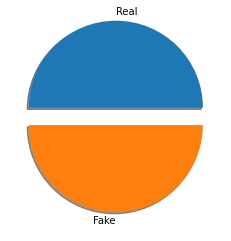

Real news count:  1603
Fake news count:  1603


In [12]:
# 1 == Fake and 0 == Real
real_news = len(df[df['label'] == 0])
fake_news = len(df[df['label'] == 1])
plt.pie([real_news, fake_news], labels=['Real', 'Fake'], explode = [0.2,0.0] , shadow=True)
plt.show()

print("Real news count: ", real_news)
print("Fake news count: ", fake_news)

# Data Preprocessing

## Converting text to lowercase

In [13]:
df['article'] = df['article'].apply(lambda txt: txt.lower())

In [14]:
df.head()

,label,article
0,0,inirekomenda ng department of health sa centra...
1,1,itinampok sa programang tutok erwin tulfo ang ...
2,0,"aniya, sa maling prescription ng ilang doktor ..."
3,0,"desidido si roque, abogado ng pamilya ng ilan ..."
4,0,isang apat na taong gulang na batang lalaki an...


## Removing Punctuations

In [15]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(txt):
  all_list = [char for char in txt if char not in string.punctuation]
  return ''.join(all_list)

In [17]:
df['article'] = df['article'].apply(remove_punctuation)

In [18]:
df.head()

,label,article
0,0,inirekomenda ng department of health sa centra...
1,1,itinampok sa programang tutok erwin tulfo ang ...
2,0,aniya sa maling prescription ng ilang doktor a...
3,0,desidido si roque abogado ng pamilya ng ilan s...
4,0,isang apat na taong gulang na batang lalaki an...


## Removing stopwords

Stop words are the words in a stop list which are filtered out before or after processing of natural language data because they are insignificant. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.

### English Stopwords

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

df['article'] = df['article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,article
0,0,inirekomenda ng department health sa central v...
1,1,itinampok sa programang tutok erwin tulfo ang ...
2,0,aniya sa maling prescription ng ilang doktor a...
3,0,desidido si roque abogado ng pamilya ng ilan s...
4,0,isang apat na taong gulang na batang lalaki an...


### Tagalog Stopwords

In [20]:
tl_stopwords = []
with open('stopwords-tl.txt') as topo_file:
    for line in topo_file:
        tl_stopwords.append(line.replace('\n', ''))
tl_stopwords.extend(['ba', 'eh', 'kasi', 'lang', 'mo', 'naman', 'opo', 'po', 'si', 'talaga', 'yung'])

In [21]:
print(tl_stopwords)

['akin', 'aking', 'ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano', 'anumang', 'apat', 'at', 'atin', 'ating', 'ay', 'bababa', 'bago', 'bakit', 'bawat', 'bilang', 'dahil', 'dalawa', 'dapat', 'din', 'dito', 'doon', 'gagawin', 'gayunman', 'ginagawa', 'ginawa', 'ginawang', 'gumawa', 'gusto', 'habang', 'hanggang', 'hindi', 'huwag', 'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan', 'inyong', 'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyong', 'ka', 'kahit', 'kailangan', 'kailanman', 'kami', 'kanila', 'kanilang', 'kanino', 'kanya', 'kanyang', 'kapag', 'kapwa', 'karamihan', 'katiyakan', 'katulad', 'kaya', 'kaysa', 'ko', 'kong', 'kulang', 'kumuha', 'kung', 'laban', 'lahat', 'lamang', 'likod', 'lima', 'maaari', 'maaaring', 'maging', 'mahusay', 'makita', 'marami', 'marapat', 'masyado', 'may', 'mayroon', 'mga', 'minsan', 'mismo', 'mula', 'muli', 'na', 'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'namin', 'napaka', 'narito', 'nasaan', 'ng', 'ngayon', 'ni', 'nila',

In [22]:
df['article'] = df['article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (tl_stopwords)]))
df.head()

,label,article
0,0,inirekomenda department health central visayas...
1,1,itinampok programang tutok erwin tulfo moderno...
2,0,aniya maling prescription ilang doktor nadevel...
3,0,desidido roque abogado pamilya biktima kasuhan...
4,0,taong gulang batang lalaki nasawi nang masunog...


## Visualizing Frequent Word Occurrency

In [23]:
from wordcloud import WordCloud

is_fake = df['label'] == 1
fake_data = df[is_fake]
real_data = df[~is_fake]

Fake News


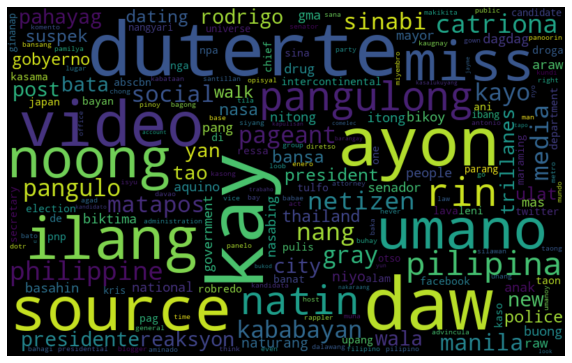

In [24]:
all_words = ' '.join([text for text in fake_data.article])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
print("Fake News")

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Real News


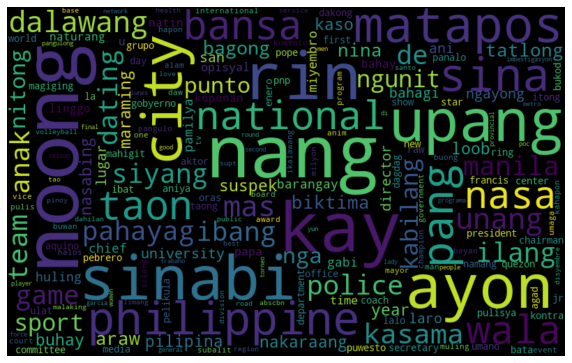

In [25]:
print("Real News")
all_words = ' '.join([text for text in real_data.article])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most frequent words counter

In [26]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
  all_words = ' '.join([text for text in text[column_text]])
  token_phrase = token_space.tokenize(all_words)
  frequency = nltk.FreqDist(token_phrase)
  df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                  "Frequency": list(frequency.values())})
  df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
  ax.set(ylabel = "Count")
  plt.xticks(rotation='vertical')
  plt.show()

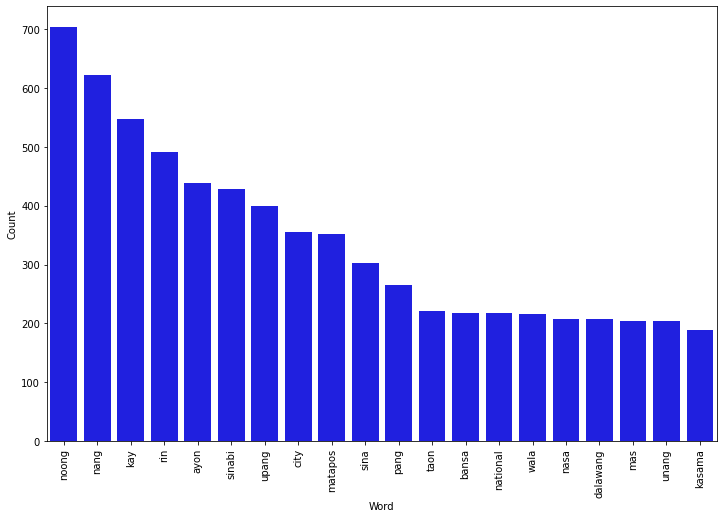

In [27]:
counter(df[df["label"] == 0], "article", 20)

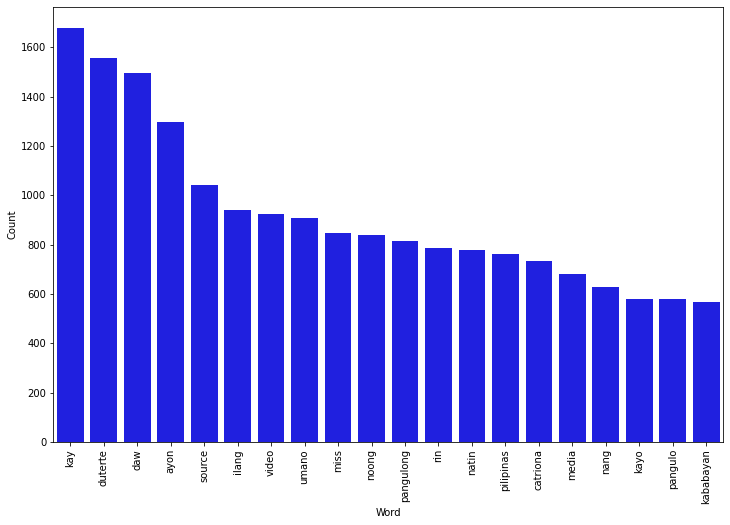

In [28]:
counter(df[df["label"] == 1], "article", 20)

# Model Development

## Splitting Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['label'], test_size=0.2, random_state=42)

In [30]:
X_train.shape, y_train.shape

((2564,), (2564,))

In [31]:
X_test.shape, y_test.shape

((642,), (642,))

## Selecting Base Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier

models = {
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': MultinomialNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier()
}

results = []
for name, model in models.items():
  pipeline = Pipeline([
                    ('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', model)
                    ])
  pipeline.fit(X_train, y_train)
  prediction = pipeline.predict(X_test)
  print("{} accuracy: {}%".format(name, round(accuracy_score(y_test, prediction)*100,2)))

DecisionTree accuracy: 91.74%
NaiveBayes accuracy: 91.43%
KNeighborsClassifier accuracy: 87.54%
RandomForestClassifier accuracy: 93.77%
AdaBoostClassifier accuracy: 92.21%
BaggingClassifier accuracy: 91.59%
GradientBoostingClassifier accuracy: 92.83%
ExtraTreesClassifier accuracy: 93.77%


## Hyperparameter Tuning

In [33]:
# pipeline = Pipeline([
#                     ('vect', CountVectorizer()),
#                     ('tfidf', TfidfTransformer()),
#                     ('model', ExtraTreesClassifier())
#                     ])

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
# param_grid = {
#     "model__random_state": [0, 1, 2, 3, 4],   # [0, 1, 2, 3, 4],
#     "model__n_estimators": [320, 340, 360, 380, 400], # [320, 340, 360, 380, 400],
#     "model__max_depth": [25, 30, 32, 34, 38, 45]      # [25, 30, 32, 34, 38, 45]
# }

# grid_search = GridSearchCV(pipeline, scoring='accuracy', cv=cv, param_grid=param_grid, verbose=True)
# # grid_search.get_params().keys()
# grid_search.fit(X_train, y_train)

In [34]:
# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(param_grid.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [35]:
pipeline = Pipeline([
                    ('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', ExtraTreesClassifier())
                    ])

## Fitting the model

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', ExtraTreesClassifier())])

## Predicting testing dataset

In [37]:
predictions = pipeline.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))

accuracy: 93.46%


In [38]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization


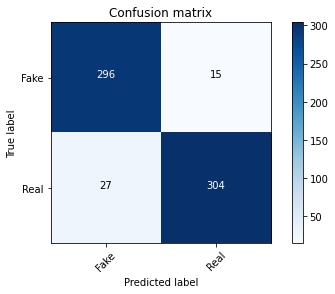

In [39]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Saving the ML pipeline

In [41]:
import pickle

pickle.dump(pipeline, open('ph_fake_news_pipeline.pkl', 'wb'))